## Linear Regression  to predict Total Medals for top 25 countries
---

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

### Top 25 countries that won most medals
---

In [2]:
top_df = pd.read_csv('top_25.csv')
print(top_df.shape)
top_df.head()

(25, 9)


,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals
0,USA,4,10362,565,4341,1035,802,707,2544
1,Russia,1,6323,404,3191,592,498,487,1577
2,Germany,2,8471,510,3766,442,457,490,1389
3,UK,3,7634,525,3665,278,316,298,892
4,France,2,7023,540,3479,233,255,282,770


In [3]:
top_df['CountryId'] = [(x+1) for x in range(25)]
print(top_df.shape)
top_df.head()

(25, 10)


,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,USA,4,10362,565,4341,1035,802,707,2544,1
1,Russia,1,6323,404,3191,592,498,487,1577,2
2,Germany,2,8471,510,3766,442,457,490,1389,3
3,UK,3,7634,525,3665,278,316,298,892,4
4,France,2,7023,540,3479,233,255,282,770,5


In [4]:
top_df = top_df[['Country', 'CountryId']]
print(top_df.shape)
top_df.head()

(25, 2)


,Country,CountryId
0,USA,1
1,Russia,2
2,Germany,3
3,UK,4
4,France,5


### Summer Olympic data with athlete, sports, evnets and medals count
---

In [5]:
df = pd.read_csv('summer_athlete_medals_count.csv')
print(df.shape)
df.head()

(2790, 10)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals
0,1896,Greece,1,102,9,39,10,17,17,44
1,1896,USA,0,14,3,16,11,6,2,19
2,1896,Germany,0,19,6,27,7,5,2,14
3,1896,France,0,12,6,18,5,4,2,11
4,1896,UK,0,10,7,19,3,3,3,9


In [6]:
df = pd.merge(df,top_df, how = 'left', on = 'Country')
print(df.shape)
df.head()

(2790, 11)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,1896,Greece,1,102,9,39,10,17,17,44,25.0
1,1896,USA,0,14,3,16,11,6,2,19,1.0
2,1896,Germany,0,19,6,27,7,5,2,14,3.0
3,1896,France,0,12,6,18,5,4,2,11,5.0
4,1896,UK,0,10,7,19,3,3,3,9,4.0


In [7]:
# Dropping the countries that are not top 25
df = df.dropna()
print(df.shape)
df.head()

(634, 11)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId
0,1896,Greece,1,102,9,39,10,17,17,44,25.0
1,1896,USA,0,14,3,16,11,6,2,19,1.0
2,1896,Germany,0,19,6,27,7,5,2,14,3.0
3,1896,France,0,12,6,18,5,4,2,11,5.0
4,1896,UK,0,10,7,19,3,3,3,9,4.0


In [8]:
df['Athletes per event'] = round(df['Athletes']/df['Events'], 2)
print(df.shape)
df.head()

(634, 12)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId,Athletes per event
0,1896,Greece,1,102,9,39,10,17,17,44,25.0,2.62
1,1896,USA,0,14,3,16,11,6,2,19,1.0,0.88
2,1896,Germany,0,19,6,27,7,5,2,14,3.0,0.70
3,1896,France,0,12,6,18,5,4,2,11,5.0,0.67
4,1896,UK,0,10,7,19,3,3,3,9,4.0,0.53


### Finding total medals won per year by each country

In [9]:
totalmedals_df = df.groupby(['Year'])['Medals'].sum()
totalmedals_df

Year
1896    115
1900    277
1904    275
1906    215
1908    317
1912    306
1920    426
1924    361
1928    318
1932    344
1936    373
1948    376
1952    399
1956    425
1960    417
1964    465
1968    466
1972    550
1976    579
1980    578
1984    598
1988    666
1992    690
1996    644
2000    703
2004    691
2008    677
2012    681
2016    662
Name: Medals, dtype: int64

In [10]:
df = pd.merge(df,totalmedals_df, how = 'left', on = 'Year')
df.head()

,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals_x,CountryId,Athletes per event,Medals_y
0,1896,Greece,1,102,9,39,10,17,17,44,25.0,2.62,115
1,1896,USA,0,14,3,16,11,6,2,19,1.0,0.88,115
2,1896,Germany,0,19,6,27,7,5,2,14,3.0,0.70,115
3,1896,France,0,12,6,18,5,4,2,11,5.0,0.67,115
4,1896,UK,0,10,7,19,3,3,3,9,4.0,0.53,115


In [11]:
df = df.rename(columns = {'Medals_x': 'Medals', 'Medals_y': 'Total Medals won this year'})
print(df.shape)
df.head()

(634, 13)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId,Athletes per event,Total Medals won this year
0,1896,Greece,1,102,9,39,10,17,17,44,25.0,2.62,115
1,1896,USA,0,14,3,16,11,6,2,19,1.0,0.88,115
2,1896,Germany,0,19,6,27,7,5,2,14,3.0,0.70,115
3,1896,France,0,12,6,18,5,4,2,11,5.0,0.67,115
4,1896,UK,0,10,7,19,3,3,3,9,4.0,0.53,115


In [12]:
df['% of Total Medals'] = round(df['Medals']/df['Total Medals won this year'] * 100,2)
print(df.shape)
df.head()

(634, 14)


,Year,Country,Host,Athletes,Sports,Events,Gold,Silver,Bronze,Medals,CountryId,Athletes per event,Total Medals won this year,% of Total Medals
0,1896,Greece,1,102,9,39,10,17,17,44,25.0,2.62,115,38.26
1,1896,USA,0,14,3,16,11,6,2,19,1.0,0.88,115,16.52
2,1896,Germany,0,19,6,27,7,5,2,14,3.0,0.70,115,12.17
3,1896,France,0,12,6,18,5,4,2,11,5.0,0.67,115,9.57
4,1896,UK,0,10,7,19,3,3,3,9,4.0,0.53,115,7.83


In [13]:
df = df.drop(['Gold', 'Silver','Bronze','Total Medals won this year'], axis =1)
print(df.shape)
df.head()

(634, 10)


,Year,Country,Host,Athletes,Sports,Events,Medals,CountryId,Athletes per event,% of Total Medals
0,1896,Greece,1,102,9,39,44,25.0,2.62,38.26
1,1896,USA,0,14,3,16,19,1.0,0.88,16.52
2,1896,Germany,0,19,6,27,14,3.0,0.70,12.17
3,1896,France,0,12,6,18,11,5.0,0.67,9.57
4,1896,UK,0,10,7,19,9,4.0,0.53,7.83


In [14]:
# 'CountryId' column to the front
col = df.pop('CountryId')
df.insert(0,'CountryId', col)

print(df.shape)
df.head()

(634, 10)


,CountryId,Year,Country,Host,Athletes,Sports,Events,Medals,Athletes per event,% of Total Medals
0,25.0,1896,Greece,1,102,9,39,44,2.62,38.26
1,1.0,1896,USA,0,14,3,16,19,0.88,16.52
2,3.0,1896,Germany,0,19,6,27,14,0.70,12.17
3,5.0,1896,France,0,12,6,18,11,0.67,9.57
4,4.0,1896,UK,0,10,7,19,9,0.53,7.83


In [15]:
df = df.sort_values(['Year', 'Medals', 'Country'], ascending = [True, False, True])
print(df.shape)
df.head()

(634, 10)


,CountryId,Year,Country,Host,Athletes,Sports,Events,Medals,Athletes per event,% of Total Medals
0,25.0,1896,Greece,1,102,9,39,44,2.62,38.26
1,1.0,1896,USA,0,14,3,16,19,0.88,16.52
2,3.0,1896,Germany,0,19,6,27,14,0.70,12.17
3,5.0,1896,France,0,12,6,18,11,0.67,9.57
4,4.0,1896,UK,0,10,7,19,9,0.53,7.83


In [16]:
df = pd.get_dummies(df, columns = ['Country'])
print(df.shape)
df.head()

(634, 34)


,CountryId,Year,Host,Athletes,Sports,Events,Medals,Athletes per event,% of Total Medals,Country_Australia,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,25.0,1896,1,102,9,39,44,2.62,38.26,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1896,0,14,3,16,19,0.88,16.52,0,...,0,0,0,0,0,0,0,0,0,1
2,3.0,1896,0,19,6,27,14,0.70,12.17,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,1896,0,12,6,18,11,0.67,9.57,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,1896,0,10,7,19,9,0.53,7.83,0,...,0,0,0,0,0,0,0,0,1,0


## Predicting medals for 2016
---

In [17]:
predict_year = 2016

#### Train data
---

In [18]:
train_df = df[df['Year'] < predict_year]
print(train_df.shape)
train_df

(609, 34)


,CountryId,Year,Host,Athletes,Sports,Events,Medals,Athletes per event,% of Total Medals,Country_Australia,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,25.0,1896,1,102,9,39,44,2.62,38.26,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,1896,0,14,3,16,19,0.88,16.52,0,...,0,0,0,0,0,0,0,0,0,1
2,3.0,1896,0,19,6,27,14,0.70,12.17,0,...,0,0,0,0,0,0,0,0,0,0
3,5.0,1896,0,12,6,18,11,0.67,9.57,0,...,0,0,0,0,0,0,0,0,0,0
4,4.0,1896,0,10,7,19,9,0.53,7.83,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
604,21.0,2012,0,98,19,71,4,1.38,0.59,0,...,0,0,0,0,0,0,0,1,0,0
605,23.0,2012,0,111,16,71,3,1.56,0.44,0,...,0,0,0,0,0,0,0,0,0,0
606,12.0,2012,0,56,14,61,3,0.92,0.44,0,...,0,0,0,0,0,0,0,0,0,0
607,18.0,2012,0,63,17,56,2,1.12,0.29,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
X = train_df.drop(['Medals'], axis=1)
y = train_df['Medals'].values.reshape(-1, 1)
print(X.shape, y.shape)

(609, 33) (609, 1)


#### Test data
---

In [20]:
test_df = df[df['Year'] == predict_year].sort_values(['CountryId'])
print(test_df.shape)
test_df.head()

(25, 34)


,CountryId,Year,Host,Athletes,Sports,Events,Medals,Athletes per event,% of Total Medals,Country_Australia,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
609,1.0,2016,0,555,33,245,121,2.27,18.28,0,...,0,0,0,0,0,0,0,0,0,1
612,2.0,2016,0,284,29,181,56,1.57,8.46,0,...,0,0,0,0,1,0,0,0,0,0
614,3.0,2016,0,418,29,217,42,1.93,6.34,0,...,0,0,0,0,0,0,0,0,0,0
611,4.0,2016,0,360,26,198,67,1.82,10.12,0,...,0,0,0,0,0,0,0,0,1,0
613,5.0,2016,0,392,32,202,42,1.94,6.34,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
test_data = test_df.drop(['Medals'], axis = 1).reset_index(drop=True)
print(test_data.shape)
test_data.head()

(25, 33)


,CountryId,Year,Host,Athletes,Sports,Events,Athletes per event,% of Total Medals,Country_Australia,Country_Belgium,...,Country_Netherlands,Country_Norway,Country_Poland,Country_Romania,Country_Russia,Country_South Korea,Country_Sweden,Country_Switzerland,Country_UK,Country_USA
0,1.0,2016,0,555,33,245,2.27,18.28,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,2016,0,284,29,181,1.57,8.46,0,0,...,0,0,0,0,1,0,0,0,0,0
2,3.0,2016,0,418,29,217,1.93,6.34,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4.0,2016,0,360,26,198,1.82,10.12,0,0,...,0,0,0,0,0,0,0,0,1,0
4,5.0,2016,0,392,32,202,1.94,6.34,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
top_df['Medals'] = test_df['Medals'].reset_index(drop=True)
print(top_df.shape)
top_df.head()

(25, 3)


,Country,CountryId,Medals
0,USA,1,121
1,Russia,2,56
2,Germany,3,42
3,UK,4,67
4,France,5,42


#### Test Train Split & Standard Scaler
---

In [23]:
# Use train_test_split to create training and testing data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)

In [39]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(456, 33) (153, 33) (456, 1) (153, 1)


## Linear Regression Model
---

In [24]:
# Create the model using LinearRegression

from sklearn.linear_model import LinearRegression

model1 = LinearRegression()

#### Fit the model to the training data and calculate the scores for the training and testing data

In [25]:
model1.fit(X_train, y_train)

training_score = model1.score(X_train, y_train)
testing_score = model1.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.941870999095097
Testing Score: 0.9333970579540831


Text(0.5, 1.0, 'Residual Plot')

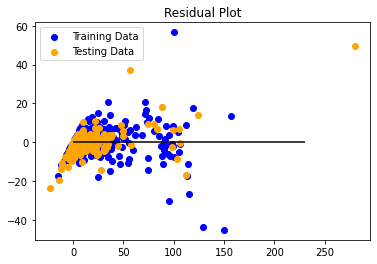

In [26]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model1.predict(X_train), model1.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model1.predict(X_test), model1.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

### Linear regression model for scaled data
---

In [27]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data
X_scaler = StandardScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

y_scaler = StandardScaler().fit(y_train)

y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

#### Fit the model to the scaled training data and calculate the scores

In [28]:
model2 = LinearRegression()

model2.fit(X_train_scaled, y_train_scaled)

training_score = model2.score(X_train_scaled, y_train_scaled)
testing_score = model2.score(X_test_scaled, y_test_scaled)

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.9418705478899069
Testing Score: 0.9332843845045122


### Using model1 to predict medals for test_data
---

In [29]:
lg_predictions = model1.predict(test_data)
lg_predictions = np.ravel(lg_predictions)
lg_predictions

array([106.81286621,  57.96670532,  50.02877808,  51.9894104 ,
        40.21612549,  33.73361206,  66.52529907,  38.56948853,
         7.55734253,  15.36117554,  38.28115845,   2.78140259,
        23.08901978,   7.34310913,  23.73260498,  17.36532593,
        18.96118164,   5.60559082,  13.49002075,  14.37536621,
         8.79876709,   8.77313232,   6.65405273,   7.54833984,
         2.48284912])

In [30]:
lg_predictions = np.around(lg_predictions, decimals =0)
lg_predictions

array([107.,  58.,  50.,  52.,  40.,  34.,  67.,  39.,   8.,  15.,  38.,
         3.,  23.,   7.,  24.,  17.,  19.,   6.,  13.,  14.,   9.,   9.,
         7.,   8.,   2.])

In [31]:
top_df['Predicted'] = lg_predictions.astype(int)
top_df = top_df.rename(columns={'Medals': 'Actual'})
top_df

,Country,CountryId,Actual,Predicted
0,USA,1,121,107
1,Russia,2,56,58
2,Germany,3,42,50
3,UK,4,67,52
4,France,5,42,40
5,Italy,6,28,34
6,China,7,70,67
7,Australia,8,29,39
8,Sweden,9,11,8
9,Hungary,10,15,15


In [32]:
top_df['Error'] = top_df['Predicted'] - top_df['Actual']
top_df

,Country,CountryId,Actual,Predicted,Error
0,USA,1,121,107,-14
1,Russia,2,56,58,2
2,Germany,3,42,50,8
3,UK,4,67,52,-15
4,France,5,42,40,-2
5,Italy,6,28,34,6
6,China,7,70,67,-3
7,Australia,8,29,39,10
8,Sweden,9,11,8,-3
9,Hungary,10,15,15,0


In [41]:
from sklearn.metrics import mean_squared_error

MSE = mean_squared_error(top_df['Actual'], lg_predictions)
r2 = model1.score(X_test, y_test)

print(f"MSE: {MSE}, R2: {r2}")

MSE: 31.48, R2: 0.9333970579540831
R2: 0.9333970579540831


### Plot Residuals
---

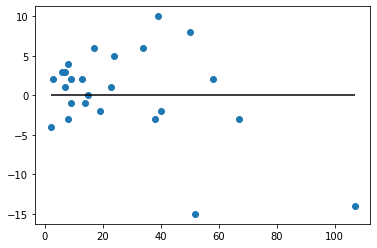

In [33]:
y = top_df['Actual']
plt.scatter(lg_predictions, lg_predictions - y)
plt.hlines(y=0, xmin=lg_predictions.min(), xmax=lg_predictions.max())
plt.show()